<a href="https://colab.research.google.com/github/huy20146177/baitapAI/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

So nay la: [1]


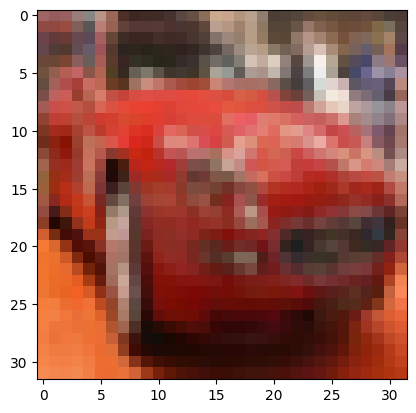

In [9]:
import matplotlib.pyplot as plt
hinh= x_train[5]   #Lấy hình ở vị trí thứ 55
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("So nay la:",y_train[5])

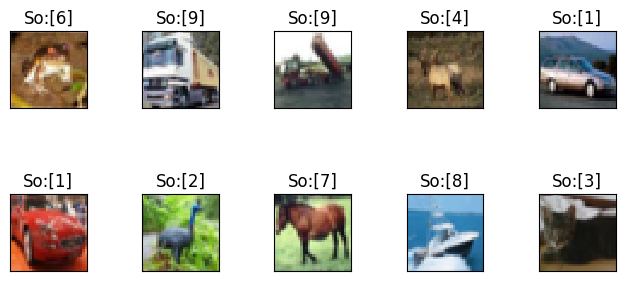

In [10]:
for i in range(10):
  plt.subplot(3,5,i+1)  # 2 hàng 5 cột 
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(512, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [12]:
x_train = x_train.reshape((50000,32*32*3,))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3,))
x_test = x_test.astype('float32')/255

In [13]:
from keras.utils import to_categorical #Lệnh chuyển qua 

y_train = to_categorical(y_train, 10) #chuyển sang 10 kênh
y_test = to_categorical(y_test, 10)

In [14]:
from keras.models import load_model
# Tải mô hình từ file đã lưu
model = load_model('./model_cifar10.h5')

In [16]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 100, batch_size= 128) # Mỗi lần học chỉ 128 dữ liệu, không học hết 60000 dữ liệu , học tổng cộng 10 lầnlần
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)
model.save('model_cifar10.h5')

Epoch 1/100
391/391 [==============================] - 17s 38ms/step - loss: 0.5120 - accuracy: 0.8250
Epoch 2/100
391/391 [==============================] - 13s 34ms/step - loss: 0.4904 - accuracy: 0.8272
Epoch 3/100
391/391 [==============================] - 12s 32ms/step - loss: 0.4969 - accuracy: 0.8288
Epoch 4/100
391/391 [==============================] - 13s 33ms/step - loss: 0.4947 - accuracy: 0.8286
Epoch 5/100
391/391 [==============================] - 12s 32ms/step - loss: 0.4878 - accuracy: 0.8267
Epoch 6/100
391/391 [==============================] - 12s 30ms/step - loss: 0.4914 - accuracy: 0.8281
Epoch 7/100
391/391 [==============================] - 12s 30ms/step - loss: 0.4935 - accuracy: 0.8276
Epoch 8/100
391/391 [==============================] - 12s 31ms/step - loss: 0.4918 - accuracy: 0.8293
Epoch 9/100
391/391 [==============================] - 12s 31ms/step - loss: 0.4959 - accuracy: 0.8262
Epoch 10/100
391/391 [==============================] - 12s 32ms/step - l

In [17]:
model.save('model_cifar10.h5')

1/1 [==============================] - 0s 88ms/step


array([2])

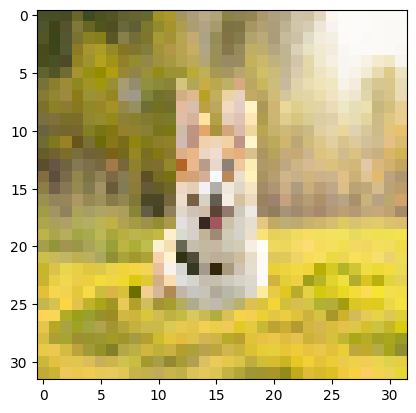

In [20]:
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
img = load_img('cho.jpg',target_size=(32,32))
plt.imshow(img)

img= img_to_array(img)

img =img.reshape(1,32*32*3)
img = img.astype('float32')
img = img /255
np.argmax(model.predict(img),axis=-1)